## Used Vehicles Price Prediction 

The primary objective of this project, in tandem with our chosen dataset is to create a predictive model that can predict the price of a used vehicle based on various features such as the year, make, model, price, condition, odometer reading, and other relevant information.  

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
from os.path import curdir

csv_path = os.path.join(curdir,'vehicles.csv')
data = pd.read_csv(csv_path, header='infer')

In [3]:
data.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
data.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# drop unncessary columns
data = data.drop(columns=['id','url', 'region_url', 'image_url', 'description', 'VIN', 'lat', 'long','posting_date'])
# drop county: all null
data = data.drop(columns=['county'])
# drop size: more than 75% non null
data = data.drop(columns=['size'])

# drop duplicates
data = data.drop_duplicates()  

In [7]:
data['year'] = 2023-data['year']

In [8]:
data = data.dropna(subset=['year', 'odometer'])

In [9]:
data.fillna('n/a', inplace=True)

In [10]:
data['condition'].value_counts()

n/a          138332
good         116331
excellent     84804
like new      18266
fair           6592
new            1109
salvage         581
Name: condition, dtype: int64

In [11]:
data['type'].value_counts()

n/a            77914
sedan          73990
SUV            65329
pickup         37954
truck          30096
other          19702
coupe          17418
hatchback      15080
wagon           9066
van             7331
convertible     6880
mini-van        4224
offroad          575
bus              456
Name: type, dtype: int64

In [12]:
data['paint_color'].value_counts()

n/a       106886
white      69465
black      54920
silver     37199
blue       27297
red        26957
grey       20835
green       6529
brown       5864
custom      5760
yellow      1929
orange      1767
purple       607
Name: paint_color, dtype: int64

<h1><center> CATEGORICAL DATA CLEANING

In [13]:
data.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

1. region

In [14]:
region = data['region'].value_counts()

In [15]:
region

minneapolis / st paul    2912
columbus                 2849
seattle-tacoma           2840
portland                 2832
denver                   2822
                         ... 
meridian                   28
southwest MS               14
kansas city                11
fort smith, AR              9
west virginia (old)         8
Name: region, Length: 404, dtype: int64

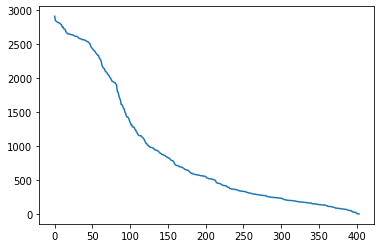

In [16]:
plt.plot(range(len(region)), region)

In [17]:
# replace cateogry with less than 50 counts as others
data['region'] = data['region'].apply(lambda s: s if str(s) in region[:50] else 'others')

In [18]:
data['region'].value_counts()

others                     233408
minneapolis / st paul        2912
columbus                     2849
seattle-tacoma               2840
portland                     2832
denver                       2822
sacramento                   2817
SF bay area                  2815
jacksonville                 2807
central NJ                   2794
chicago                      2789
north jersey                 2756
boston                       2756
san diego                    2727
phoenix                      2723
long island                  2714
orange county                2681
ft myers / SW florida        2675
dallas / fort worth          2654
stockton                     2653
washington, DC               2652
new york city                2647
houston                      2647
albuquerque                  2641
atlanta                      2638
des moines                   2638
spokane / coeur d'alene      2631
grand rapids                 2627
orlando                      2618
tampa bay area

2. manufacturer

In [19]:
manufacturer = data['manufacturer'].value_counts()

In [20]:
manufacturer

ford               60748
chevrolet          46979
toyota             29328
honda              18195
jeep               16054
nissan             15921
ram                15501
gmc                14503
n/a                14131
bmw                12929
dodge              11361
mercedes-benz      10210
hyundai             8497
volkswagen          8379
subaru              8234
lexus               7193
kia                 7006
audi                6861
cadillac            5992
acura               5507
chrysler            5147
buick               4803
mazda               4741
infiniti            4350
lincoln             3808
volvo               3003
mitsubishi          2895
mini                2106
pontiac             2056
rover               1843
jaguar              1841
porsche             1207
mercury             1024
saturn               950
alfa-romeo           860
tesla                829
fiat                 704
harley-davidson      133
ferrari               84
datsun                62


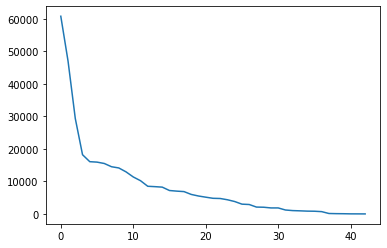

In [21]:
plt.plot(range(len(manufacturer)), manufacturer)

In [22]:
# replace manufacturer with less than 30 counts as others
data['manufacturer'] = data['manufacturer'].apply(lambda s: s if str(s) in manufacturer[:30] else 'others')

In [23]:
data['manufacturer'].value_counts()

ford             60748
chevrolet        46979
toyota           29328
honda            18195
jeep             16054
nissan           15921
ram              15501
gmc              14503
n/a              14131
bmw              12929
dodge            11361
mercedes-benz    10210
hyundai           8497
volkswagen        8379
subaru            8234
others            7734
lexus             7193
kia               7006
audi              6861
cadillac          5992
acura             5507
chrysler          5147
buick             4803
mazda             4741
infiniti          4350
lincoln           3808
volvo             3003
mitsubishi        2895
mini              2106
pontiac           2056
rover             1843
Name: manufacturer, dtype: int64

3. model

In [24]:
model = data['model'].value_counts()

In [25]:
model

f-150                      6454
n/a                        4614
silverado 1500             4176
1500                       3347
camry                      2510
                           ... 
freestar 7-pass. van          1
1980 CJ7                      1
F15O LIMITED EDITION          1
MITS. OUTLANDER SUV           1
Paige Glenbrook Touring       1
Name: model, Length: 29237, dtype: int64

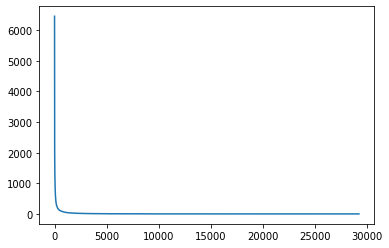

In [26]:
plt.plot(range(len(model)), model)

In [27]:
# replace model with less than 100 counts as others
data['model'] = data['model'].apply(lambda s: s if str(s) in model[:100] else 'others')

In [28]:
data['model'].value_counts()

others                      243893
f-150                         6454
n/a                           4614
silverado 1500                4176
1500                          3347
                             ...  
300                            551
patriot                        549
frontier                       536
compass                        530
wrangler unlimited sport       528
Name: model, Length: 101, dtype: int64

In [29]:
for i in data.columns:
  print(i, len(data[i].value_counts().index))

region 51
price 15508
year 113
manufacturer 31
model 101
condition 7
cylinders 9
fuel 6
odometer 104630
title_status 7
transmission 4
drive 4
type 14
paint_color 13
state 51


<h1><center> NUMERICAL DATA CLEANING

In [30]:
data.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [31]:
data.describe()

,price,year,odometer
count,3.660150e+05,366015.000000,3.660150e+05
mean,8.502040e+04,11.934970,9.733135e+04
std,1.315616e+07,9.811762,2.119456e+05
min,0.000000e+00,1.000000,0.000000e+00
25%,5.999000e+03,6.000000,3.589000e+04
50%,1.449500e+04,10.000000,8.379100e+04
75%,2.699000e+04,15.000000,1.334640e+05
max,3.736929e+09,123.000000,1.000000e+07


1. price

In [32]:
p1 = data['price'].quantile(0.99)
p2 = data['price'].quantile(0.1)
print(p1, p2)

66990.0 1500.0


In [33]:
# remove price data that falls out of quantile 0.1 and 0.99
data = data[(data['price']<p1) & (data['price']>p2)]

2. odometer

In [34]:
o1 = data['odometer'].quantile(0.99)
o2 = data['odometer'].quantile(0.05)
print(o1, o2)

280000.0 7207.650000000003


In [35]:
# remove price data that falls out of quantile 0.5 and 0.99
data = data[(data['odometer']<o1) & (data['odometer']>o2)]

In [36]:
data.describe()

,price,year,odometer
count,305547.000000,305547.000000,305547.000000
mean,18697.621116,11.954311,94838.824659
std,12893.329269,8.895760,59269.375072
min,1508.000000,1.000000,7209.000000
25%,7995.000000,6.000000,42386.500000
50%,15950.000000,10.000000,89955.000000
75%,27000.000000,15.000000,136520.000000
max,66988.000000,118.000000,279974.000000


In [37]:
data.shape

(305547, 15)

<h1><center> EXPLORATORY DATA ANALYSIS

In [101]:
data.corr(method='pearson', min_periods=1,)

,price,year,odometer
price,1.000000,-0.408453,-0.56777
year,-0.408453,1.000000,0.35830
odometer,-0.567770,0.358300,1.00000


In [102]:
data.year = data.year.astype('int')

<AxesSubplot:>

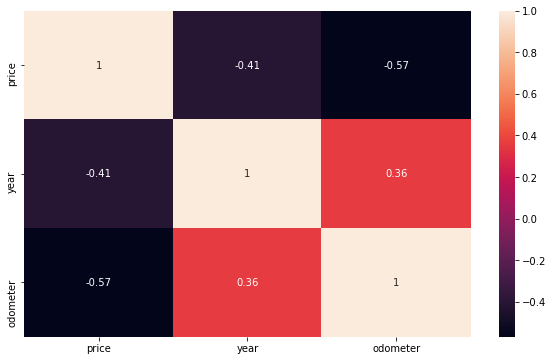

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [64]:
data

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,others,33590,9,gmc,others,good,8 cylinders,gas,57923.0,clean,other,n/a,pickup,white,al
28,others,22590,13,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,n/a,pickup,blue,al
29,others,39590,3,chevrolet,others,good,8 cylinders,gas,19160.0,clean,other,n/a,pickup,red,al
30,others,30990,6,toyota,others,good,8 cylinders,gas,41124.0,clean,other,n/a,pickup,red,al
31,others,15000,10,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426874,others,33590,5,others,others,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,wy
426875,others,23590,4,nissan,others,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,n/a,wy
426876,others,30590,3,others,others,good,n/a,gas,12029.0,clean,other,fwd,sedan,red,wy
426878,others,28990,5,others,others,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [71]:
quantity_by_brand = data.groupby('model').agg('count').year.reset_index().sort_values('year', ascending=False)
quantity_by_brand

,model,year
32,others,232451
18,f-150,5415
42,silverado 1500,3410
30,n/a,3092
0,1500,2847
41,silverado,2138
6,camry,2108
3,accord,2084
8,civic,2004
16,escape,1925


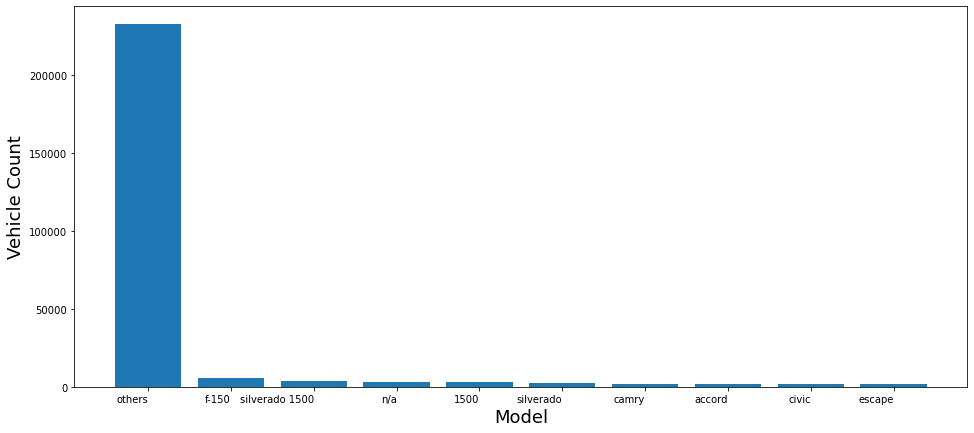

In [74]:
plt.figure(figsize=(16,7))
plt.bar('model', 'year', data=quantity_by_brand[:10])
plt.xticks(rotation=0, ha='right')
plt.ylabel('Vehicle Count', fontsize=18)
plt.xlabel('Model', fontsize=18)
plt.show()

Text(0.5, 0, 'Model')

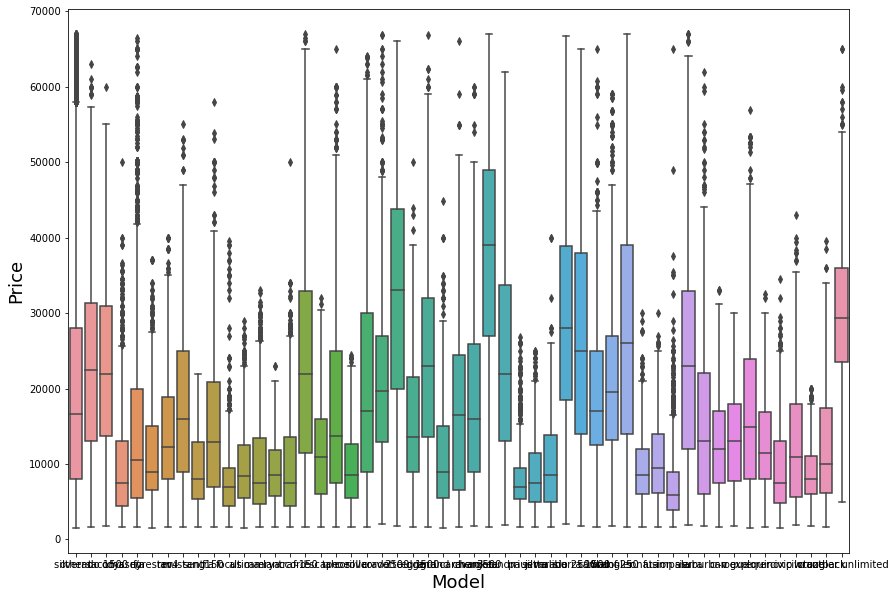

In [76]:
plt.figure(figsize=(14,10))
sns.boxplot(x='model', y='price', data=data)
plt.ylabel('Price', fontsize=18)
plt.xlabel('Model', fontsize=18)

In [77]:
data.groupby('model').agg({'year': 'count', })

,year
model,
1500,2847
2500,1815
3500,1045
accord,2084
altima,1823
camaro,787
camry,2108
charger,906
civic,2004


In [82]:
data[(data.model == 'f-150') & (data.price > 1500000000)].sort_values(by='price', ascending=False).model.unique()

array([], dtype=object)

In [83]:
data[(data.model == 'toyota') & (data.price > 1500000000)].sort_values(by='price', ascending=False).model.unique()

array([], dtype=object)

In [87]:
quantity_by_fuel = data.groupby('fuel').agg('count').year.reset_index()
quantity_by_origin = data.groupby('region').agg('count').year.reset_index()
quantity_by_transmission = data.groupby('transmission').agg('count').year.reset_index()
quantity_by_type = data.groupby('type').agg('count').year.reset_index()
quantity_by_year = data.groupby('year').agg('count').transmission.reset_index()

In [88]:
quantity_by_transmission

,transmission,year
0,automatic,234152
1,manual,17809
2,n/a,1155
3,other,52431


<BarContainer object of 4 artists>

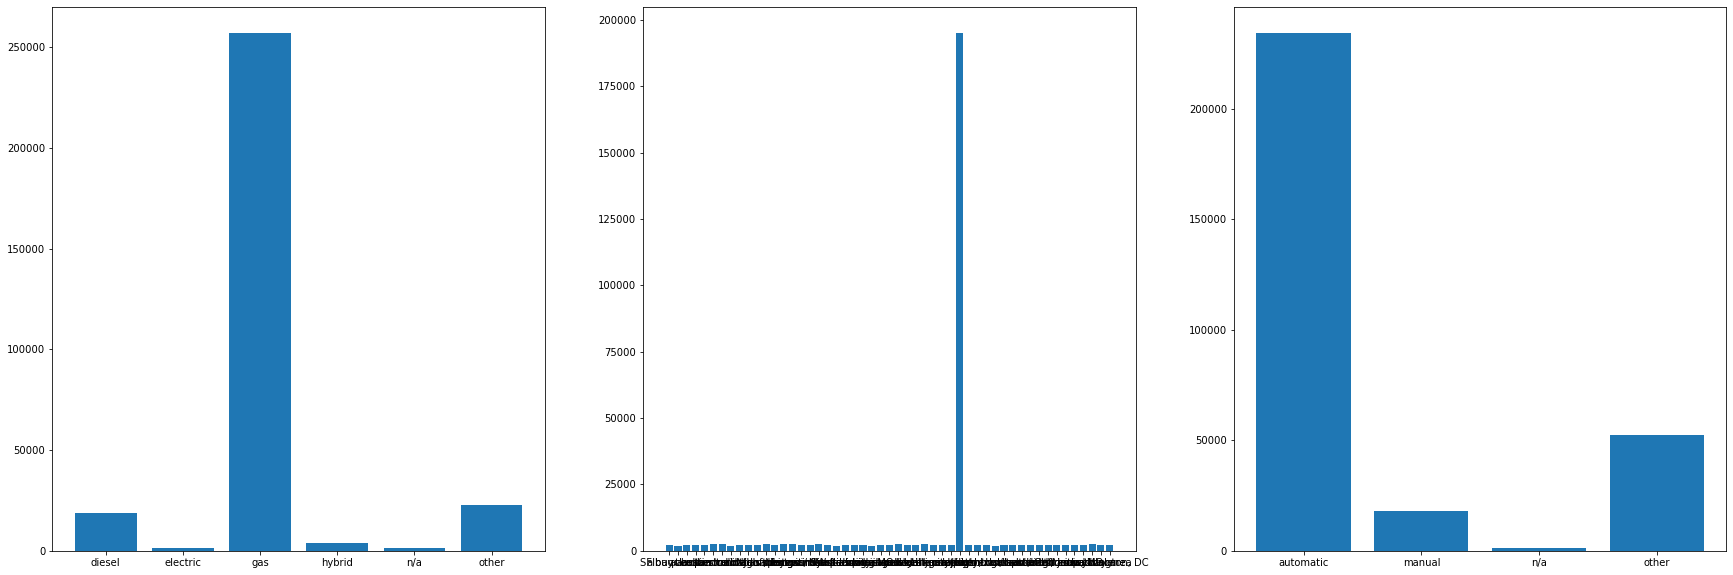

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,10))
ax1.bar('fuel', 'year', data=quantity_by_fuel)
ax2.bar('region', 'year', data=quantity_by_origin)
ax3.bar('transmission', 'year', data=quantity_by_transmission)

Text(0.5, 0, 'Vehicle Count')

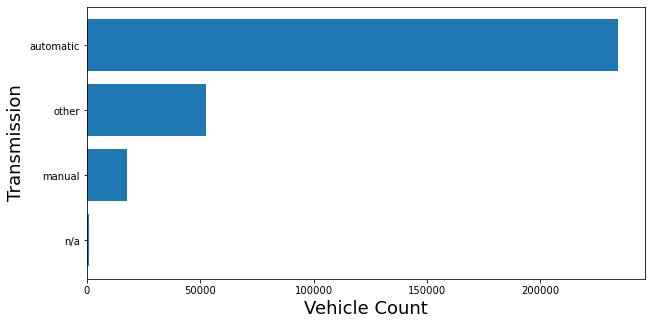

In [90]:
plt.figure(figsize=(10,5))
plt.barh('transmission', 'year', data=quantity_by_transmission.sort_values(by='year', ascending=True))
plt.ylabel('Transmission', fontsize=18)
plt.xlabel('Vehicle Count', fontsize=18)

/Users/andrewoginni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Vehicle Count')

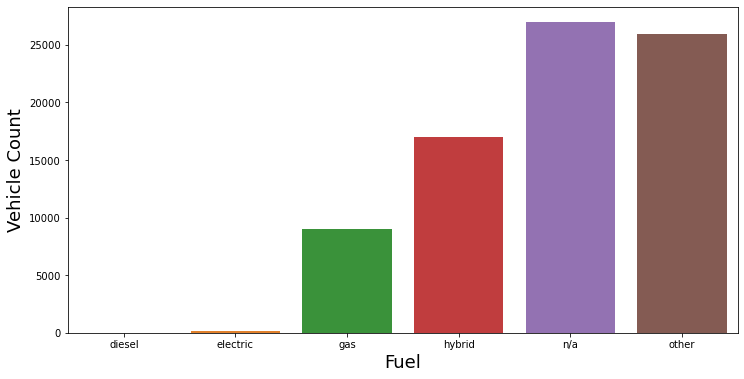

In [93]:
plt.figure(figsize=(12,6))
sns.barplot(quantity_by_fuel.fuel, quantity_by_year.transmission)
plt.xlabel('Fuel', fontsize=18)
plt.ylabel('Vehicle Count', fontsize=18)

Text(0.5, 0, 'Vehicle Count')

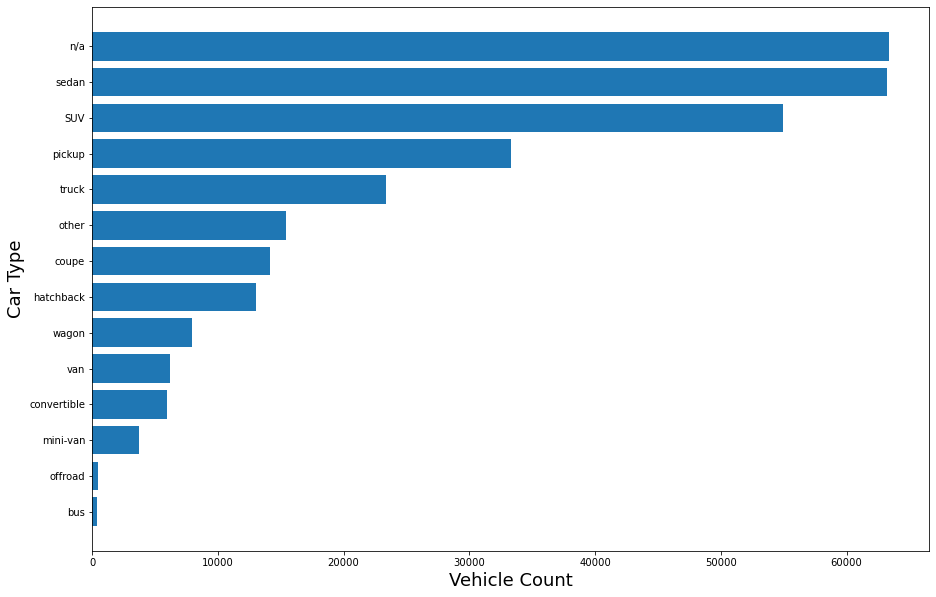

In [94]:
quantity_by_type.sort_values(by='year', ascending=True, inplace=True)

plt.figure(figsize=(15,10))
plt.barh(quantity_by_type.type, quantity_by_type.year)
plt.ylabel('Car Type', fontsize=18)
plt.xlabel('Vehicle Count', fontsize=18)

<h1><center> FEATURE ENGINEERING

<h1><center> DATA PREPROCESSING

In [38]:
data.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [38]:
# only recent 23 years
data_filter = data[data['year'] <= 23]
# drop all the rows with missing values
data_filter = data_filter.replace('n/a', np.nan)
data_filter.drop(data_filter[data_filter.isna().sum(axis=1)>=1].index, inplace=True)

In [39]:
data_filter.shape

(85785, 15)

In [40]:
data_filter.head(1)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,others,15000,10.0,ford,others,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [41]:
# build dummy variables for those variables that can be used to build a predictive model.
#In this stage, we are including independent variables that can describe a vehicle model and status.
data_filter = pd.concat([data_filter,
                 pd.get_dummies(data_filter['manufacturer'], prefix = 'manufacturer_',drop_first=True),
                  pd.get_dummies(data_filter['condition'], prefix = 'condition_',drop_first=True),
                pd.get_dummies(data_filter['cylinders'], prefix = 'cylinders_',drop_first=True),
                pd.get_dummies(data_filter['fuel'], prefix = 'fuel_',drop_first=True),
                  pd.get_dummies(data_filter['title_status'], prefix = 'status_',drop_first=True),
                  pd.get_dummies(data_filter['transmission'], prefix = 'transmission_',drop_first=True),
                pd.get_dummies(data_filter['drive'], prefix = 'drive_',drop_first=True),
                  pd.get_dummies(data_filter['type'], prefix = 'type_',drop_first=True),
                pd.get_dummies(data_filter['paint_color'], prefix = 'paint_color_',drop_first=True),
                pd.get_dummies(data_filter['state'], prefix = 'state',drop_first=True)], axis = 1)

In [42]:
data_filter = data_filter.drop(columns=['region', 'manufacturer', 'model','condition',
                                       'cylinders', 'fuel', 'title_status', 'transmission',
                                       'drive', 'type', 'paint_color', 'state'])

In [43]:
data_filter.columns = data_filter.columns.str.replace(' ', '')
data_filter.columns = data_filter.columns.str.replace('-', '')
data_filter.columns = data_filter.columns.str.replace('/', '')
data_filter.columns = data_filter.columns.str.replace("'", '')
data_filter.columns = data_filter.columns.str.replace(",", '')

<h1><center> REGRESSION MODEL

In [44]:
X = data_filter.drop(columns=['price']).values
y = data_filter['price'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,train_size=0.7,random_state=0)

In [45]:
# Train our model and assess it against training data
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [46]:
print("R-Squared:", reg.score(X_train, y_train))

R-Squared: 0.8007620476523449


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sqrt

In [48]:
print("R^2:", 'train: ', reg.score(X_train,y_train), 'test: ', reg.score(X_test,y_test))
print("Root Mean Squared Error:", 'train: ', sqrt(
    mean_squared_error(y_train,reg.predict(X_train))),
     'test: ', sqrt(
    mean_squared_error(y_test,reg.predict(X_test))))
print("Mean Absolute Error:", 'train: ', mean_absolute_error(
    y_train,reg.predict(X_train)), 'test: ',
     mean_absolute_error(
    y_test,reg.predict(X_test)))

R^2: train:  0.8007620476523449 test:  0.8027642584840369
Root Mean Squared Error: train:  5468.768112789091 test:  5421.683490291597
Mean Absolute Error: train:  3965.0326892252606 test:  3930.8834684920103


In [49]:
X_train_df = pd.DataFrame(X_train, columns = data_filter.columns[1:])
y_train_df = pd.DataFrame(y_train, columns = [data_filter.columns[0]])
train_df = pd.concat([y_train_df, X_train_df], axis=1,  join="inner")

In [50]:
train_df

,price,year,odometer,manufacturer__audi,manufacturer__bmw,manufacturer__buick,manufacturer__cadillac,manufacturer__chevrolet,manufacturer__chrysler,manufacturer__dodge,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,11995,16.0,89417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,23500,15.0,235000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44990,9.0,33566.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25990,9.0,82140.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14995,10.0,118198.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60044,22888,5.0,55018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60045,3750,18.0,221622.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60046,4500,16.0,138000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60047,7999,12.0,150000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y = 'price ~ '
for col_name in train_df.columns:
    if col_name != 'price':
        y += col_name + ' ' + '+' + ' '
        
regcol = f'{y[:-2]}'

In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols(regcol, train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1867.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:08:29   Log-Likelihood:            -6.0204e+05
No. Observations:               60049   AIC:                         1.204e+06
Df Residuals:                   59919   BIC:                         1.206e+06
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   5.877e+04    499.866    117.569      0.000    5.78e+04    5.97e+04
year                       -1053.6280      6.559   -160.639      0.000   -1066.484   -1040.772
odometer                      -0.0655      0.001   -117.248      0.000      -0.067      -0.064
manufacturer__audi          -849.2043    297.568     -2.854      0.004   -1432.439    -265.969
manufacturer__bmw          -1516.8224    251.169     -6.039      0.000   -2009.115   -1024.530
manufacturer__buick        -1950.7150    290.280     -6.720      0.000   -2519.665   -1381.765
manufacturer__cadillac      -603.8220    284.988     -2.119      0.034   -1162.399     -45.245
manufacturer__chevrolet    -1961.2382    222.025     -8.833      0.000   -2396.409   -1526.068
manufacturer__chrysler     -4170.4854    271.010    -15.389      0.000   -4701.666   -3639.305
manufacturer__dodge        -3840.9603    245.992    -15.614      0.000   -4323.106   -3358.815
manufacturer__ford         -2578.7526    221.197    -11.658      0.000   -3012.299   -2145.206
manufacturer__gmc          -1207.5363    242.387     -4.982      0.000   -1682.615    -732.457
manufacturer__honda          360.2391    231.263      1.558      0.119     -93.037     813.515
manufacturer__hyundai      -3381.1920    255.911    -13.212      0.000   -3882.778   -2879.606
manufacturer__infiniti     -2137.4183    282.918     -7.555      0.000   -2691.938   -1582.899
manufacturer__jeep          -870.7789    237.549     -3.666      0.000   -1336.376    -405.182
manufacturer__kia          -3937.0654    271.177    -14.518      0.000   -4468.574   -3405.557
manufacturer__lexus         1538.9746    261.747      5.880      0.000    1025.950    2052.000
manufacturer__lincoln       -964.2950    308.764     -3.123      0.002   -1569.474    -359.116
manufacturer__mazda        -1751.3937    293.754     -5.962      0.000   -2327.152   -1175.635
manufacturer__mercedesbenz   360.5933    258.838      1.393      0.164    -146.731     867.917
manufacturer__mini         -3438.4437    382.169     -8.997      0.000   -4187.495   -2689.392
manufacturer__mitsubishi   -3374.5000    337.710     -9.992      0.000   -4036.412   -2712.588
manufacturer__nissan       -3815.2757    230.890    -16.524      0.000   -4267.820   -3362.731
manufacturer__others        -344.7432    277.906     -1.241      0.215    -889.441     199.954
manufacturer__pontiac       -719.8136    355.493     -2.025      0.043   -1416.581     -23.046
manufacturer__ram          -1311.7709    249.745     -5.252      0.000   -1801.272    -822.270
manufacturer__rover         1097.1414    426.268      2.574      0.010     261.655    1932.628
manufacturer__subaru       -1999.7285    265.872     -7.521      0.000   -2520.839   -1478.618
manufacturer__toyota        1407.3062    22

In [53]:
# remove column with p value lower than 0.1
y_new = 'price ~ '
for col_idx in range(1, len(model.pvalues)):
    if model.pvalues[col_idx] <= 0.1:
        y_new += train_df.columns[col_idx] + ' ' + '+' + ' '

regcol_new = f'{y_new[:-2]}'

In [54]:
model_new = ols(regcol_new, train_df).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     2112.
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:08:37   Log-Likelihood:            -6.0205e+05
No. Observations:               60049   AIC:                         1.204e+06
Df Residuals:                   59934   BIC:                         1.205e+06
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 5.876e+04    420.694    139.670      0.000    5.79e+04    5.96e+04
year                     -1057.0804      6.485   -162.992      0.000   -1069.792   -1044.369
odometer                    -0.0655      0.001   -118.162      0.000      -0.067      -0.064
manufacturer__audi       -1070.2221    218.495     -4.898      0.000   -1498.473    -641.971
manufacturer__bmw        -1729.4584    150.108    -11.521      0.000   -2023.670   -1435.247
manufacturer__buick      -2175.7416    214.084    -10.163      0.000   -2595.347   -1756.137
manufacturer__cadillac    -840.5689    204.909     -4.102      0.000   -1242.192    -438.946
manufacturer__chevrolet  -2195.8638     96.119    -22.845      0.000   -2384.257   -2007.471
manufacturer__chrysler   -4364.2553    180.647    -24.159      0.000   -4718.323   -4010.187
manufacturer__dodge      -4047.8042    141.626    -28.581      0.000   -4325.392   -3770.217
manufacturer__ford       -2811.3447     93.775    -29.980      0.000   -2995.144   -2627.545
manufacturer__gmc        -1446.4216    137.569    -10.514      0.000   -1716.057   -1176.786
manufacturer__hyundai    -3622.6703    159.853    -22.663      0.000   -3935.982   -3309.359
manufacturer__infiniti   -2367.8374    202.332    -11.703      0.000   -2764.409   -1971.266
manufacturer__jeep       -1103.5018    132.030     -8.358      0.000   -1362.282    -844.722
manufacturer__kia        -4179.6816    183.288    -22.804      0.000   -4538.927   -3820.437
manufacturer__lexus       1325.2006    171.796      7.714      0.000     988.479    1661.922
manufacturer__lincoln    -1191.0958    238.074     -5.003      0.000   -1657.721    -724.471
manufacturer__mazda      -1986.7484    213.762     -9.294      0.000   -2405.724   -1567.773
manufacturer__mini       -3669.7282    323.236    -11.353      0.000   -4303.273   -3036.184
manufacturer__mitsubishi -3615.0396    270.614    -13.359      0.000   -4145.444   -3084.635
manufacturer__nissan     -4049.7399    116.549    -34.747      0.000   -4278.177   -3821.303
manufacturer__pontiac     -949.2304    294.032     -3.228      0.001   -1525.534    -372.927
manufacturer__ram        -1547.9002    150.360    -10.295      0.000   -1842.606   -1253.195
manufacturer__rover        876.7813    376.214      2.331      0.020     139.401    1614.162
manufacturer__subaru     -2236.2942    165.243    -13.533      0.000   -2560.170   -1912.418
manufacturer__toyota      1181.1576    103.142     11.452      0.000     978.999    1383.316
manufacturer__volkswagen -3788.8752    177.944    -21.293      0.000   -4137.646   -3440.104
manufacturer__volvo      -1934.3269    307.475     -6.291      0.000   -2536.980   -1331.674
condition__fair          -1752.0805    163.934    -10.688      0.000   -2073.391   -1430.770
condition__lik

# Train Data

In [55]:
print("R^2:",reg.score(X_train,y_train))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_train,reg.predict(X_train))))
print("Mean Absolute Error:",mean_absolute_error(
    y_train,reg.predict(X_train)))

R^2: 0.8007620476523449
Root Mean Squared Error: 5468.768112789091
Mean Absolute Error: 3965.0326892252606


# Test Data

In [56]:
print("R^2:",reg.score(X_test,y_test))
print("Root Mean Squared Error:",sqrt(
    mean_squared_error(y_test,reg.predict(X_test))))
print("Mean Absolute Error:",mean_absolute_error(
    y_test,reg.predict(X_test)))

R^2: 0.8027642584840369
Root Mean Squared Error: 5421.683490291597
Mean Absolute Error: 3930.8834684920103
